# Topology Studies for v10 version

This notebook is dedicated to study the best topology to operate in the training/operation phase for the v10 tuning. Here we will study 7 CNN shallow topologies. First let's include some code before go deeper into the analysis section.

**NOTE**: All models here are feed by rings normalized by total energy (norm1)

In [1]:
from saphyra import crossval_table, get_color_fader
import saphyra
import numpy as np
import pandas as pd
import collections
import os
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence


In [2]:
def create_op_dict(op):
    d = {
              op+'_pd_ref'    : "reference/"+op+"_cutbased/pd_ref#0",
              op+'_fa_ref'    : "reference/"+op+"_cutbased/fa_ref#0",
              op+'_sp_ref'    : "reference/"+op+"_cutbased/sp_ref",
              op+'_pd_val'    : "reference/"+op+"_cutbased/pd_val#0",
              op+'_fa_val'    : "reference/"+op+"_cutbased/fa_val#0",
              op+'_sp_val'    : "reference/"+op+"_cutbased/sp_val",
              op+'_pd_op'     : "reference/"+op+"_cutbased/pd_op#0",
              op+'_fa_op'     : "reference/"+op+"_cutbased/fa_op#0",
              op+'_sp_op'     : "reference/"+op+"_cutbased/sp_op",

              # Counts
              op+'_pd_ref_passed'    : "reference/"+op+"_cutbased/pd_ref#1",
              op+'_fa_ref_passed'    : "reference/"+op+"_cutbased/fa_ref#1",
              op+'_pd_ref_total'     : "reference/"+op+"_cutbased/pd_ref#2",
              op+'_fa_ref_total'     : "reference/"+op+"_cutbased/fa_ref#2",
              op+'_pd_val_passed'    : "reference/"+op+"_cutbased/pd_val#1",
              op+'_fa_val_passed'    : "reference/"+op+"_cutbased/fa_val#1",
              op+'_pd_val_total'     : "reference/"+op+"_cutbased/pd_val#2",
              op+'_fa_val_total'     : "reference/"+op+"_cutbased/fa_val#2",
              op+'_pd_op_passed'     : "reference/"+op+"_cutbased/pd_op#1",
              op+'_fa_op_passed'     : "reference/"+op+"_cutbased/fa_op#1",
              op+'_pd_op_total'      : "reference/"+op+"_cutbased/pd_op#2",
              op+'_fa_op_total'      : "reference/"+op+"_cutbased/fa_op#2",
    }
    return d

tuned_info = collections.OrderedDict( {
              # validation
              "max_sp_val"      : 'summary/max_sp_val',
              "max_sp_pd_val"   : 'summary/max_sp_pd_val#0',
              "max_sp_fa_val"   : 'summary/max_sp_fa_val#0',
              # Operation
              "max_sp_op"       : 'summary/max_sp_op',
              "max_sp_pd_op"    : 'summary/max_sp_pd_op#0',
              "max_sp_fa_op"    : 'summary/max_sp_fa_op#0',
              } )

tuned_info.update(create_op_dict('tight'))
tuned_info.update(create_op_dict('medium'))
tuned_info.update(create_op_dict('loose'))
tuned_info.update(create_op_dict('vloose'))

In [3]:
etbins = [15,20]
etabins = [0, 0.8]

## Create and Fill the table

All tunings import here were derived using the cross-validation method (Stratified k-fold) with 10 boxes (9 for train and 1 for validation) with 10 initialization to avoid the local minimal. Since this study requeired too much resource, we will only check the et0_eta0 bin. The selected topology will be propagated to all phase spaces (25 bins) follow the current ringer grid.

In [4]:
cv  = crossval_table( tuned_info, etbins = etbins , etabins = etabins )

In [5]:
#cv.fill( '/Volumes/castor/tuning_data/Zee/new_names/v10/user.jodafons.data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97.v10_et0_eta0.r0', 'v10')
cv.fill( '~/Desktop/user.jodafons.data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97.v10_et0_eta0.r0', 'v10')

I1122 17:35:13.657871 140735988585344 macros.py:23] Reading file for v10 tag from ~/Desktop/user.jodafons.data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97.v10_et0_eta0.r0
I1122 17:35:13.658831 140735988585344 macros.py:23] There are 4200 files for this task...
I1122 17:35:13.659571 140735988585344 macros.py:23] Filling the table... 
I1122 17:36:21.034116 140735988585344 macros.py:23] End of fill step, a pandas DataFrame was created...


2020-11-22 17:35:13,657 | Py.crossval_table                       INFO Reading file for v10 tag from ~/Desktop/user.jodafons.data17_13TeV.AllPeriods.sgn.probes_lhmedium_EGAM1.bkg.VProbes_EGAM7.GRL_v97.v10_et0_eta0.r0
2020-11-22 17:35:13,658 | Py.crossval_table                       INFO There are 4200 files for this task...
2020-11-22 17:35:13,659 | Py.crossval_table                       INFO Filling the table... 
2020-11-22 17:36:21,034 | Py.crossval_table                       INFO End of fill step, a pandas DataFrame was created...


In [6]:
cv.to_csv( 'v10_many_models_et0_eta0.csv' )
#cv.from_csv( 'v10_many_models_et0_eta0.csv' )

In [7]:
best_inits = cv.filter_inits("max_sp_val")
best_inits.head()

train_tag  et_bin  eta_bin  model_idx  sort  init  \
1907       v10       0        0          0     0     5   
1806       v10       0        0          0     1     2   
1731       v10       0        0          0     2     3   
2353       v10       0        0          0     3     5   
4197       v10       0        0          0     4     3   

                                              file_name  tuned_idx  \
1907  /Users/jodafons/Desktop/user.jodafons.data17_1...          0   
1806  /Users/jodafons/Desktop/user.jodafons.data17_1...          0   
1731  /Users/jodafons/Desktop/user.jodafons.data17_1...          0   
2353  /Users/jodafons/Desktop/user.jodafons.data17_1...          0   
4197  /Users/jodafons/Desktop/user.jodafons.data17_1...          0   

      max_sp_val  max_sp_pd_val  ...  vloose_pd_ref_total  \
1907    0.980832       0.987802  ...               232819   
1806    0.979590       0.985740  ...               232819   
1731    0.977407       0.982218  ...               232819   
2353    0.978606       0.984838  ...               232819   
4197    0.979965       0.987243  ...               232819   

      vloose_fa_ref_total  vloose_pd_val_passed  vloose_fa_val_passed  \
1907               187639                 23016                   519   
1806               187639                 23016                   586   
1731               187639                 23015                   712   
2353               187639                 23018                   600   
4197               187639                 23015                   554   

      vloose_pd_val_total  vloose_fa_val_total  vloose_pd_op_passed  \
1907                23282                18764               230153   
1806                23282                18764               230153   
1731                23282                18764               230151   
2353                23282                18764               230138   
4197                23282                18764               230154   

      vloose_fa_op_passed  vloose_pd_op_total  vloose_fa_op_total  
1907                 6155              232819              187639  
1806                 6184              232819              187639  
1731                 6078              232819              187639  
2353                 5985              232819              187639  
4197                 5629              232819              187639  

[5 rows x 98 columns]

In [8]:
model_idx = best_inits.model_idx.unique()
print(model_idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]


In [9]:
# index for each kernel size
models_k2 = np.array( [0,6,12,18,24,30,36])
models_k3 = models_k2+2
models_k6 = models_k2+4

# index with L2 regularization in the last layer
models_k2_with_l2_reg = models_k2+1
models_k3_with_l2_reg = models_k3+1
models_k6_with_l2_reg = models_k6+1

In [10]:
def make_train_plots(cross, table, index, dirname):
    table_best_inits = table.loc[table.model_idx==index]
    table_best_sorts = cross.filter_sorts( table, 'max_sp_op')
    cross.plot_training_curves( table_best_inits, table_best_sorts, dirname, display=True)

In [11]:

def plot_models(table, model_index, model_index_with_reg,op, outname,title):
    
    fig, ax = plt.subplots(3,1,figsize=(12,10))
    
    # prepare the plot here
    def get_mean(table,index,name):
        return getattr(table.loc[table.model_idx==index],name).mean() * 100
    def get_std(table,index,name):
        return getattr(table.loc[table.model_idx==index],name).std() * 100
    
    # create labels
    x_labels = ['Model %d'%(i) for i in range(7)]


    values_mean = [get_mean(table,i,op+'_sp_val') for i in model_index ]
    values_std = [get_std(table,i,op+'_sp_val') for i in model_index ]

    ax[0].errorbar(x_labels, values_mean, yerr=values_std, 
                   color='b', fmt='-', capsize=10, capthick=3,marker='o')  
    
    values_mean = [get_mean(table,i,op+'_sp_val') for i in model_index_with_reg ]
    values_std = [get_std(table,i,op+'_sp_val') for i in model_index_with_reg ]

    ax[0].errorbar(x_labels, values_mean, yerr=values_std, 
                   color='k', fmt=':', capsize=10, capthick=3,marker='o')  
    ax[0].set_title(title, fontsize=18)
    ax[0].set_ylabel('SP [%]', fontsize=18)
    ax[0].legend(['without L2','with L2'])
    ax[0].grid()
    #ax[0].set_yscale('log')
    
    values_mean = [get_mean(table,i,op+'_pd_val') for i in model_index ]
    values_std = [get_std(table,i,op+'_pd_val') for i in model_index ]

    ax[1].errorbar(x_labels, values_mean, yerr=values_std, 
                   color='b', fmt='-', capsize=10, capthick=3,marker='o')  
    
    values_mean = [get_mean(table,i,op+'_pd_val') for i in model_index_with_reg ]
    values_std = [get_std(table,i,op+'_pd_val') for i in model_index_with_reg ]

    ax[1].errorbar(x_labels, values_mean, yerr=values_std, 
                   color='k', fmt=':', capsize=10, capthick=3,marker='o')  
  
    ax[1].set_ylabel('PD [%]', fontsize=18)
    ax[1].legend(['without L2','with L2'])
    ax[1].grid()
    

    
    values_mean = [get_mean(table,i,op+'_fa_val') for i in model_index ]
    values_std = [get_std(table,i,op+'_fa_val') for i in model_index ]

    ax[2].errorbar(x_labels, values_mean, yerr=values_std, 
                   color='b', fmt='-', capsize=10, capthick=3,marker='o')  
    
    values_mean = [get_mean(table,i,op+'_fa_val') for i in model_index_with_reg ]
    values_std = [get_std(table,i,op+'_fa_val') for i in model_index_with_reg ]

    ax[2].errorbar(x_labels, values_mean, yerr=values_std, 
                   color='k', fmt=':', capsize=10, capthick=3,marker='o')  
  
    ax[2].set_ylabel('Fa [%]', fontsize=18)
    ax[2].grid()
    
    ax[2].legend(['without L2','with L2'])
    #plt.title(title)
    #ax[2].set_yscale('log')

    fig.savefig(outname)
    plt.show()
    

## 1) How is the curves using the POC model version?

Here we will presents the training curves for the model used during the deep learning presentation in 2018. This was the first topology using the convolution neural networks with 1D strategy.

- Rings->Conv1D(16,relu)->Conv1D(32,relu)->Flatten()->Dense(32,relu)->Dense(1)->Sigmoid();

**Note**: It's clear that we have some overfitting here. Problably, most part of this effect came from the model complexity. We need try to reduce the number of neurons and filters and keep the same efficiency.

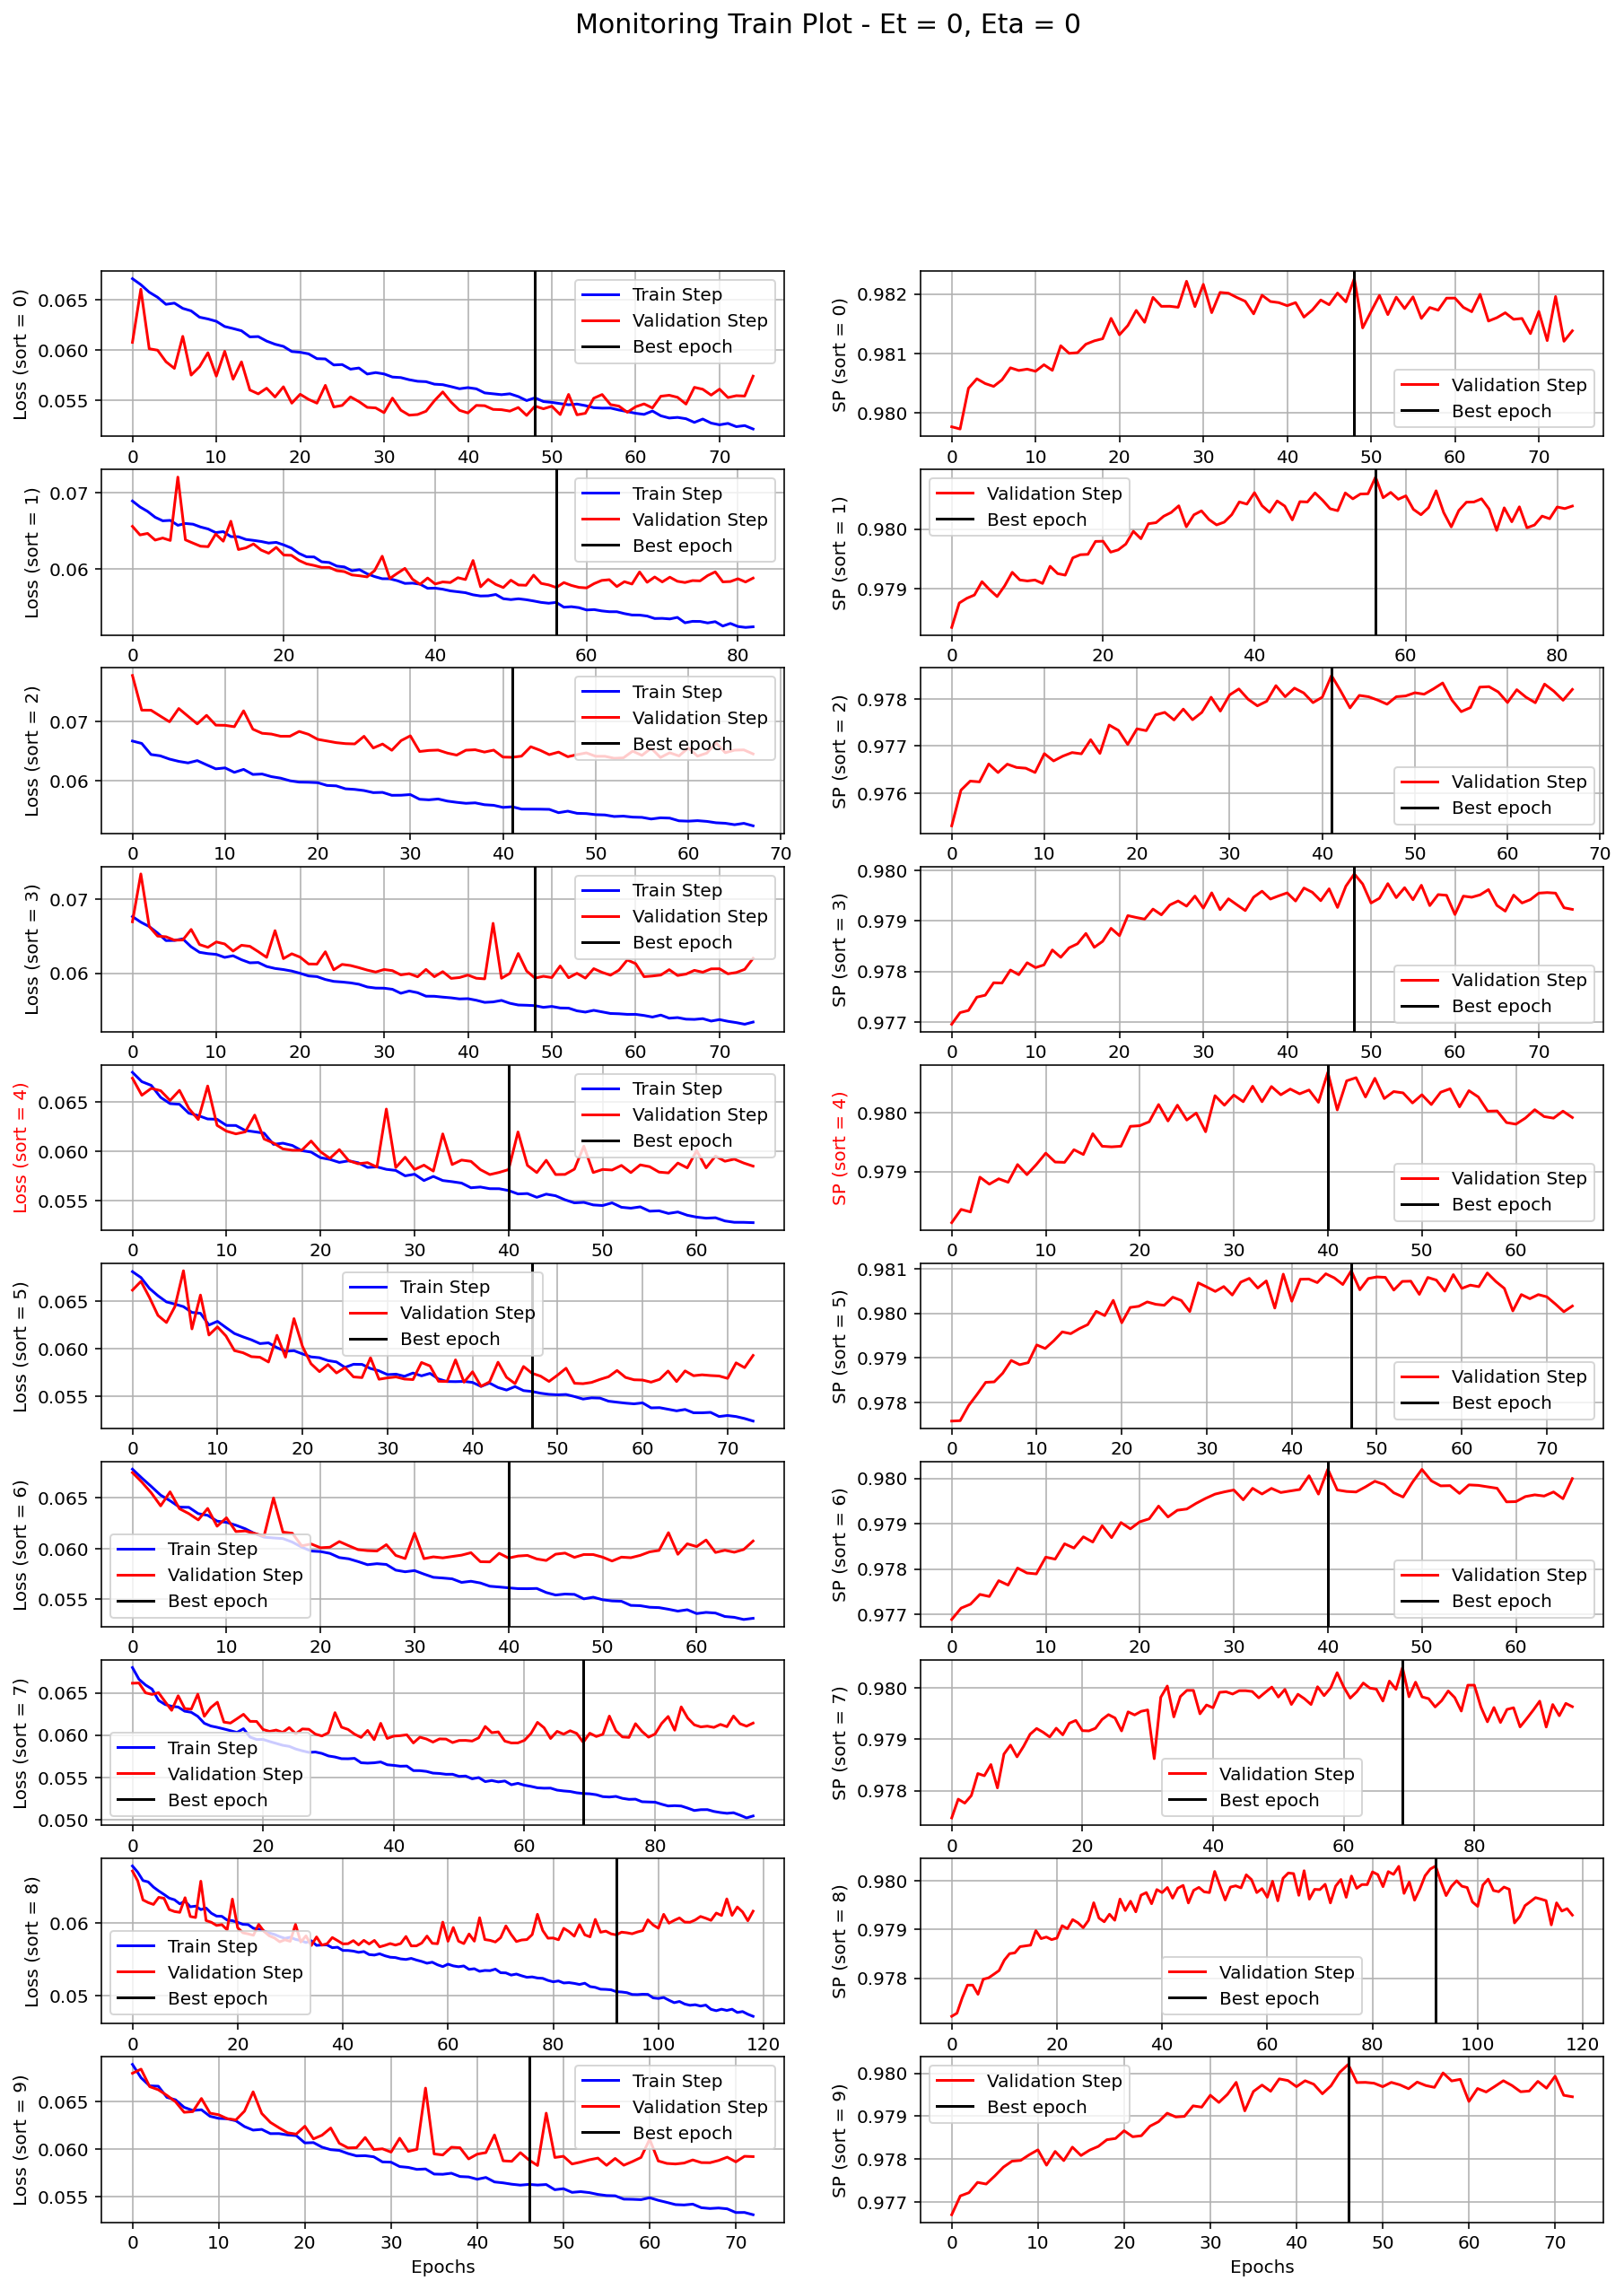

In [12]:
make_train_plots(cv, best_inits, models_k2[6], 'plots_v10_model_6_k2')

## 2) Topologies:

Here we will try to check the performance looking into many model topologies.
The models were defined as:

- Model 0: Rings->Conv1D(2,relu)->Conv1D(4,relu)->Flatten()->Dense(4,relu)->Dense(1)->Sigmoid();
- Model 1: Rings->Conv1D(2,relu)->Conv1D(4,relu)->Flatten()->Dense(8,relu)->Dense(1)->Sigmoid();
- Model 2: Rings->Conv1D(4,relu)->Conv1D(8,relu)->Flatten()->Dense(8,relu)->Dense(1)->Sigmoid();
- Model 3: Rings->Conv1D(4,relu)->Conv1D(8,relu)->Flatten()->Dense(16,relu)->Dense(1)->Sigmoid();
- Model 4: Rings->Conv1D(8,relu)->Conv1D(16,relu)->Flatten()->Dense(16,relu)->Dense(1)->Sigmoid();
- Model 5: Rings->Conv1D(8,relu)->Conv1D(16,relu)->Flatten()->Dense(32,relu)->Dense(1)->Sigmoid();
- Model 6: Rings->Conv1D(16,relu)->Conv1D(32,relu)->Flatten()->Dense(32,relu)->Dense(1)->Sigmoid();

Where each model struture will be derived using the follow configuration:

- All filters with kernel size equal 2;
- All filters with kernel size equal 3;
- All filters with kernel size equal 6;
- All filters with kernel size equal 2 and L2 regularization in the last dense layer;
- All filters with kernel size equal 3 and L2 regularization in the last dense layer;
- All filters with kernel size equal 6 and L2 regularization in the last dense layer;

The regularization study was included here to try to mitigate the overfitting observed in some models strutures (specially in the model 6 currenctelly presented in many workshops). Are gool here is try to find the best topology (model) with the best compromise betweeen efficiency and train estability. 

## 2.1) Very Loose operation:

Let's check all plots using as reference the veryloose PD cut-based.

**NOTE**: Model 6 is the current v10 version.

### 2.1.1) kernel size equal 2:

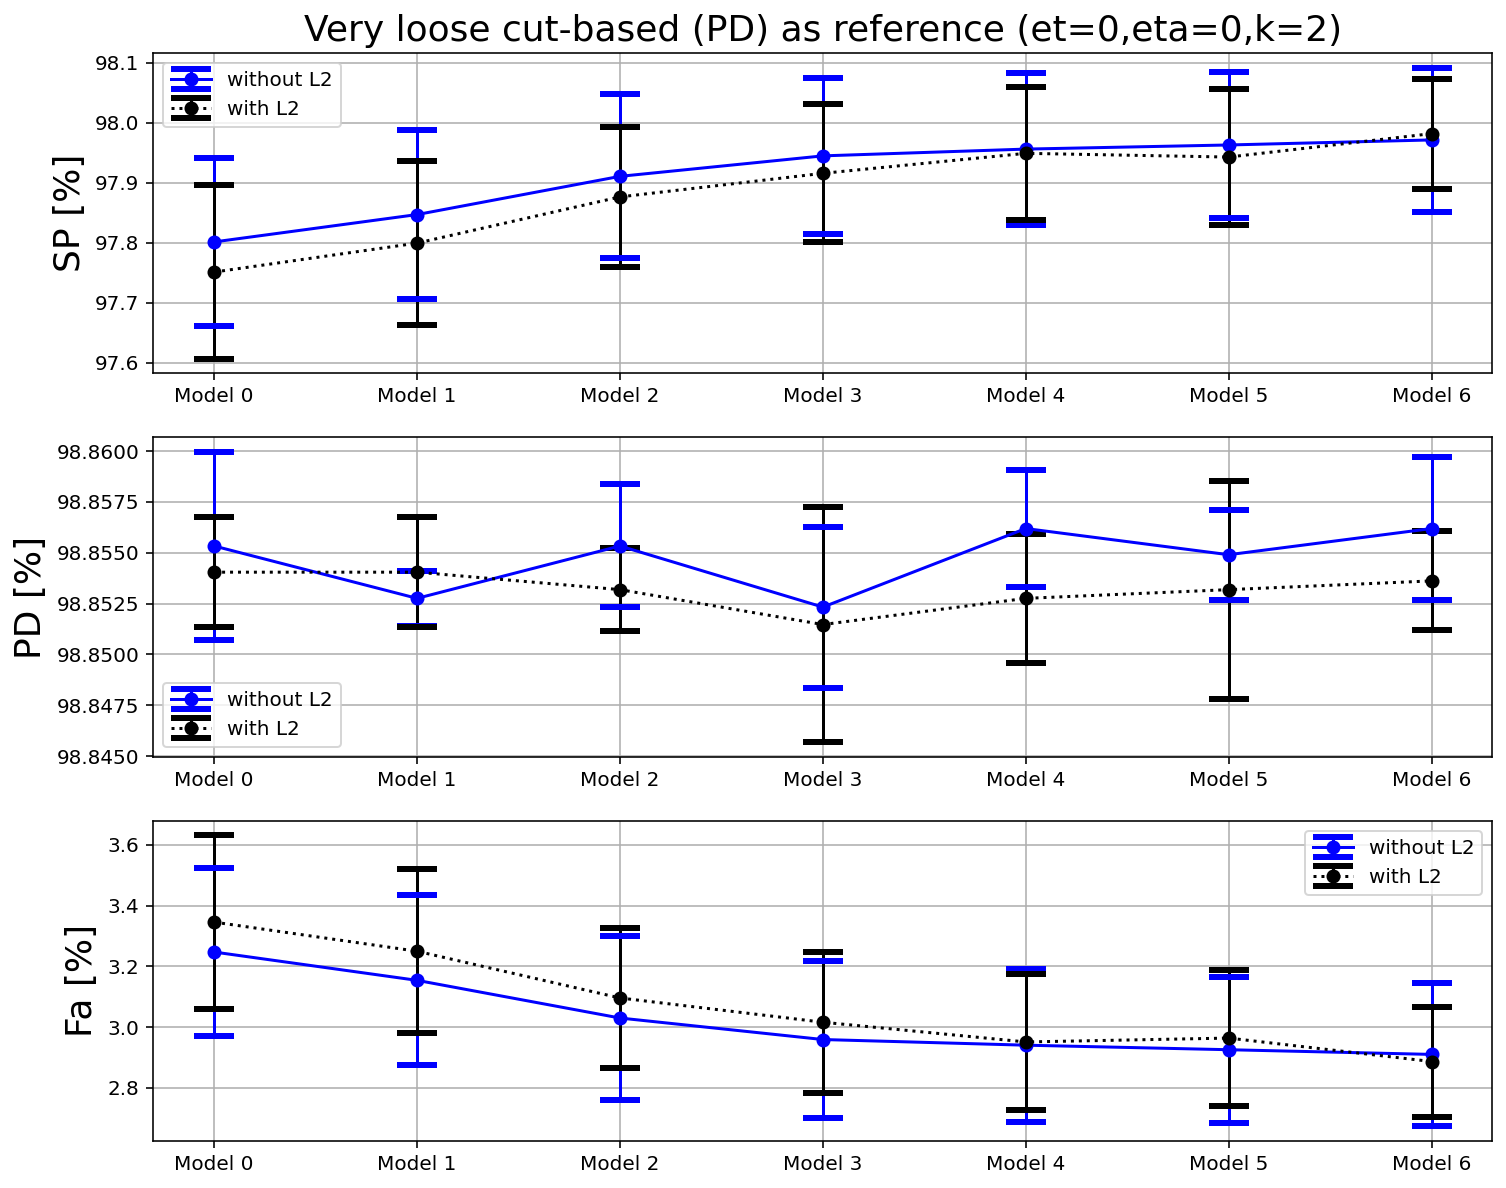

In [26]:
plot_models(best_inits, 
            models_k2,models_k2_with_l2_reg  ,
            'vloose',
            'vloose_models_k2.pdf',
            'Very loose cut-based (PD) as reference (et=0,eta=0,k=2)')

### 2.1.2) kernel size equal 3:

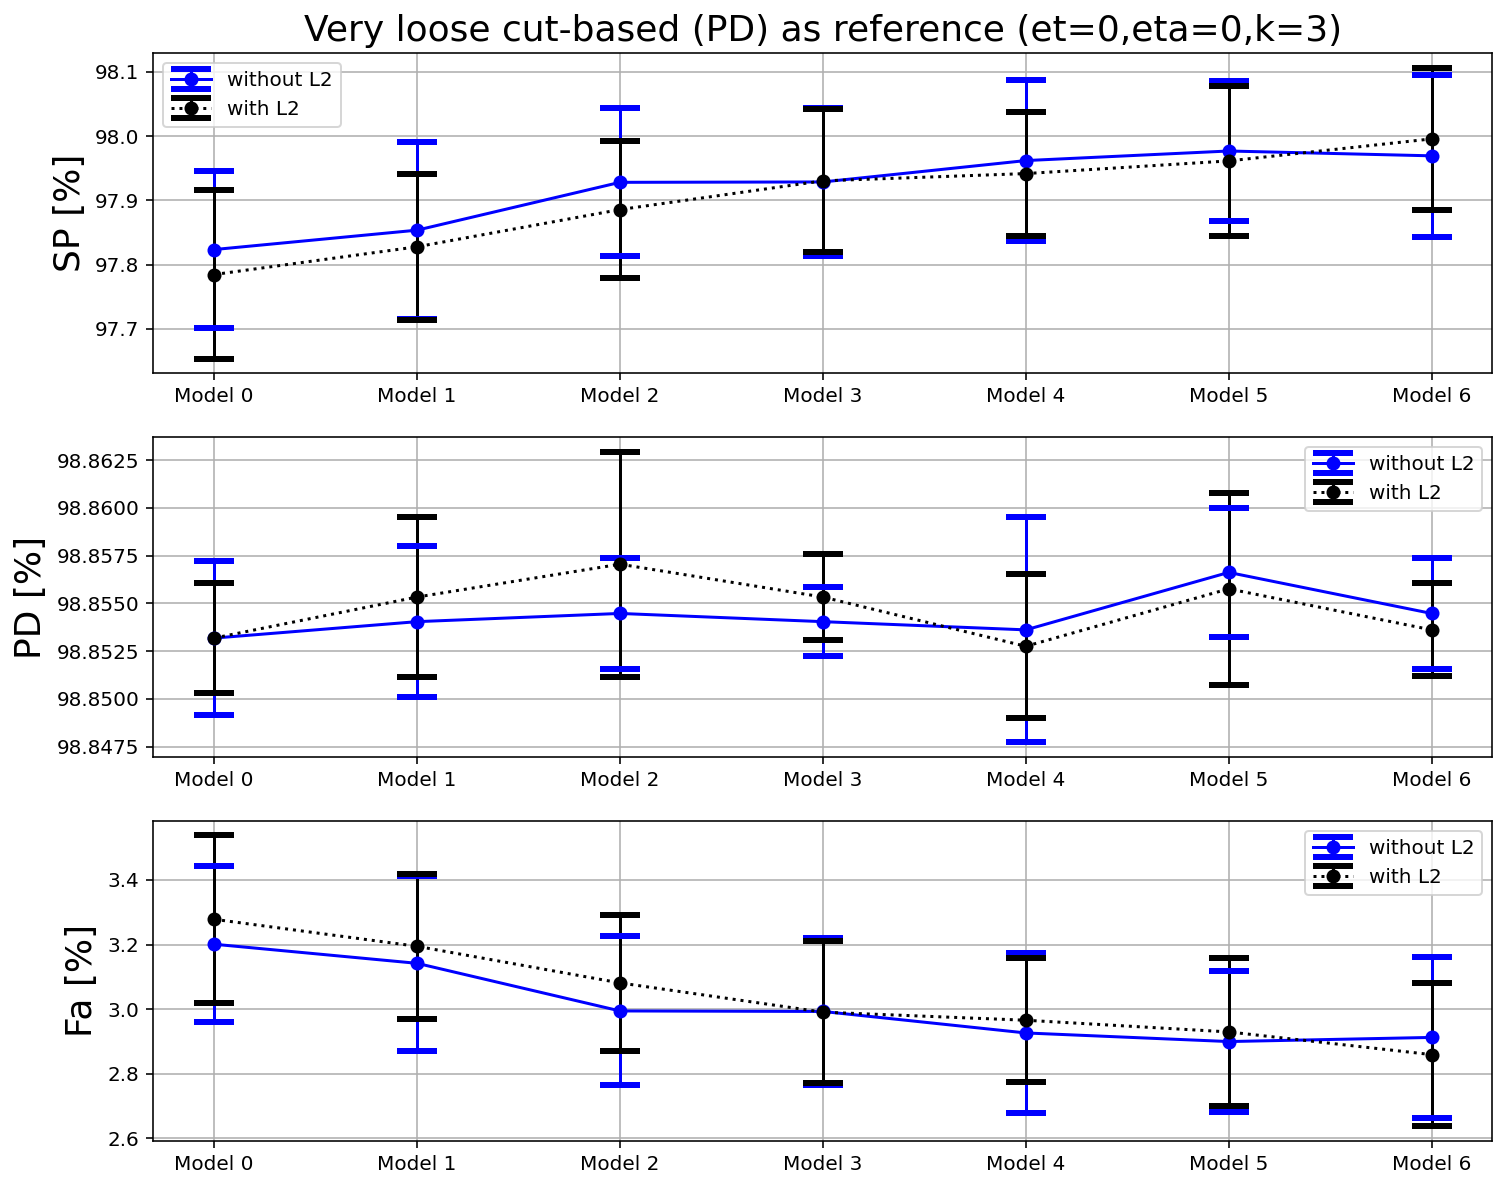

In [27]:
plot_models(best_inits, models_k3,models_k3_with_l2_reg  ,
            'vloose',
            'vloose_models_k3.pdf',
            'Very loose cut-based (PD) as reference (et=0,eta=0,k=3)')

## 2.2) Tight Operation:

### 2.2.1) Kernel size equal 2:

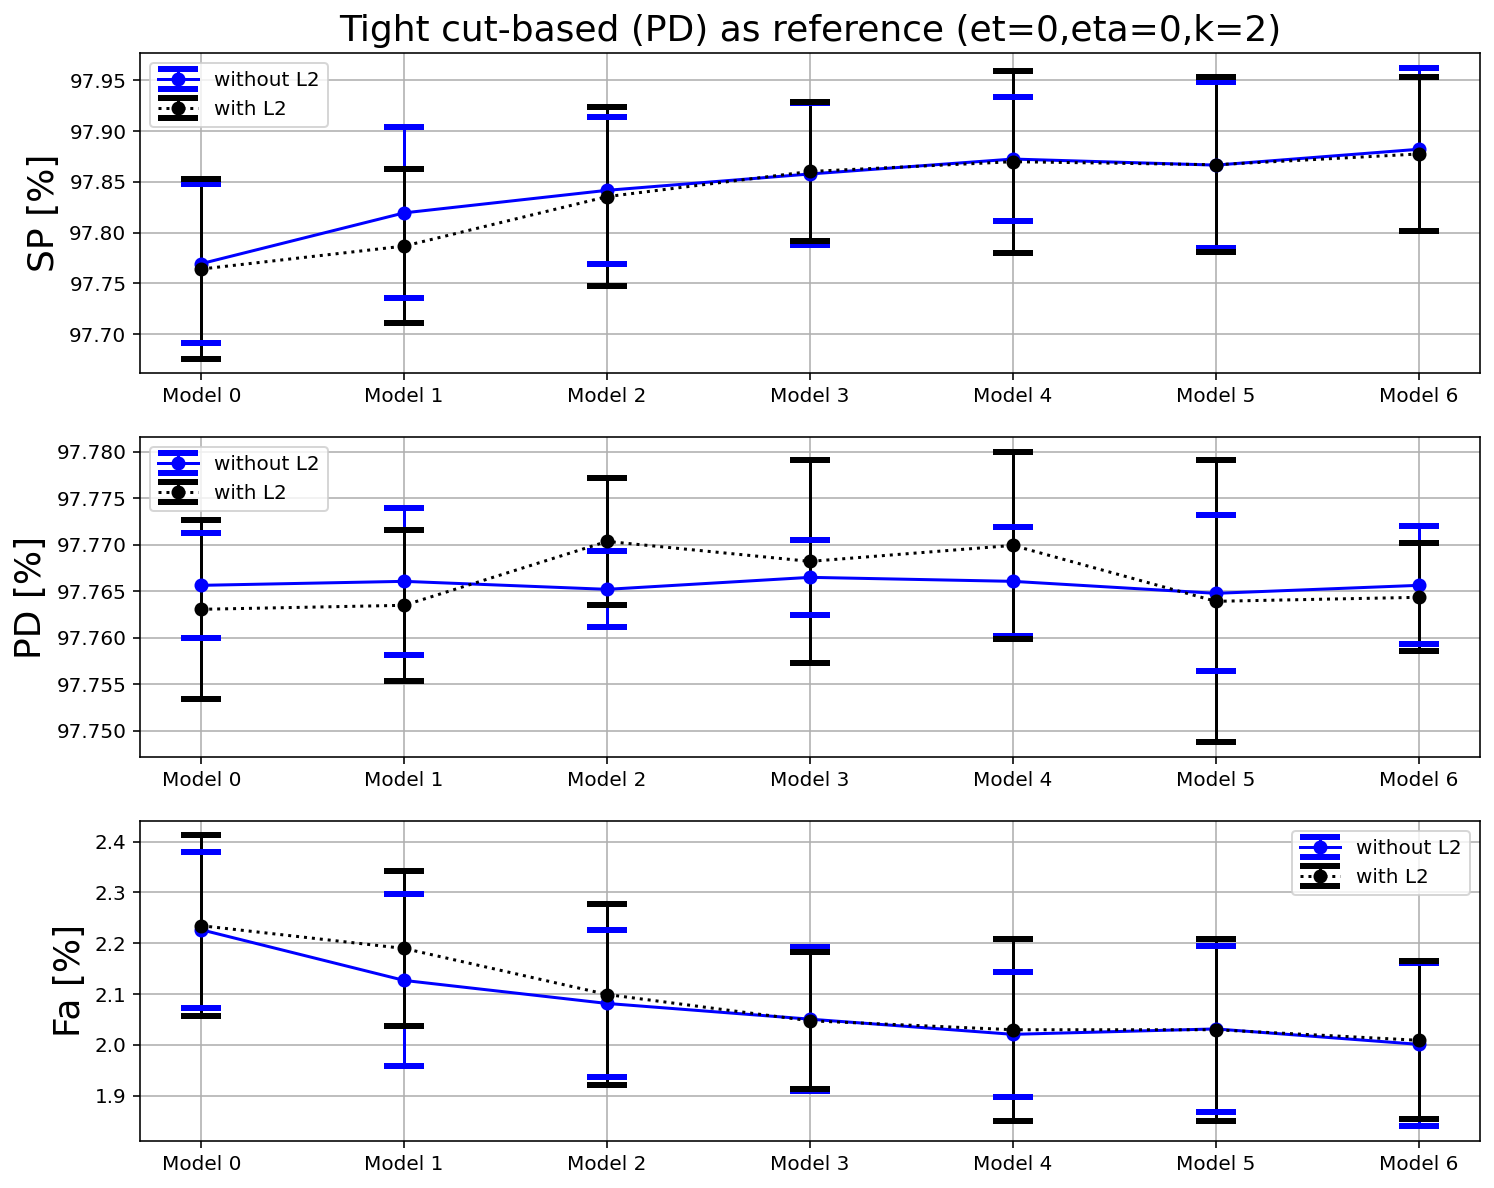

In [28]:
plot_models(best_inits, 
            models_k2,models_k2_with_l2_reg  ,
            'tight',
            'tight_models_k2.pdf',
            'Tight cut-based (PD) as reference (et=0,eta=0,k=2)')

### 2.2.2) Kernel size equal 3:

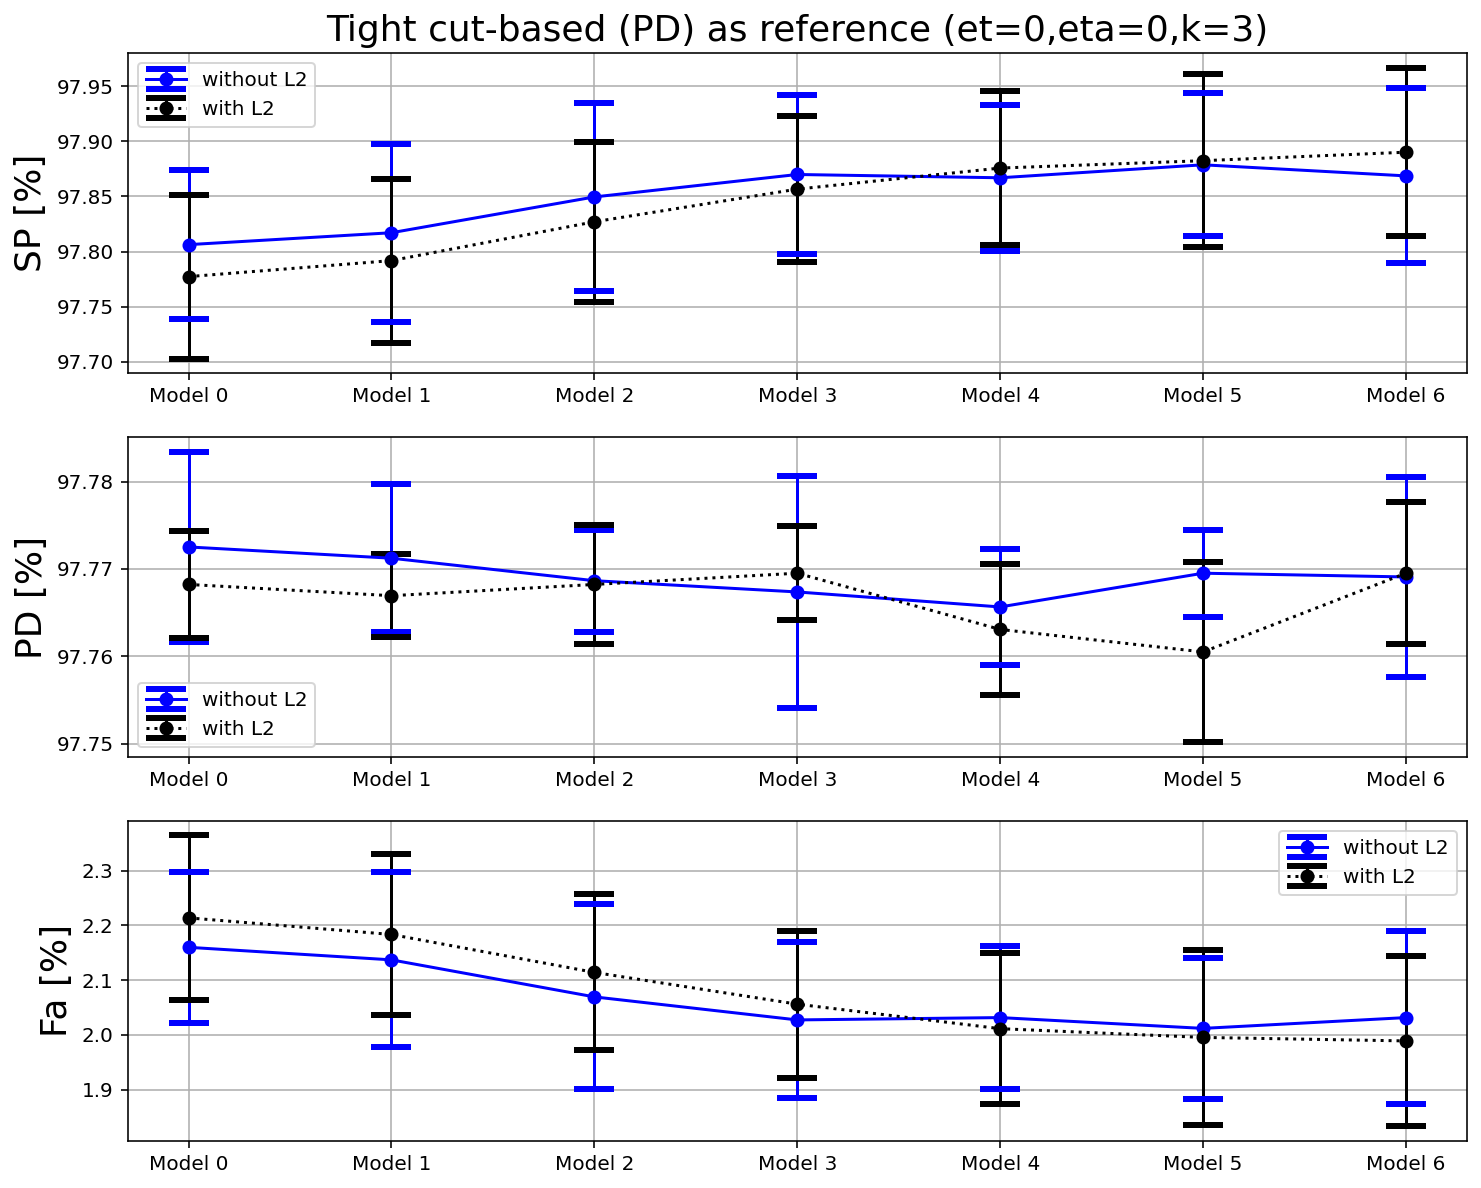

In [29]:
plot_models(best_inits, 
            models_k3,models_k3_with_l2_reg  ,
            'tight',
            'tight_models_k3.pdf',
            'Tight cut-based (PD) as reference (et=0,eta=0,k=3)')

## 3) Training curves:

### 3.1) Plot training curves for model 3 (K=2)

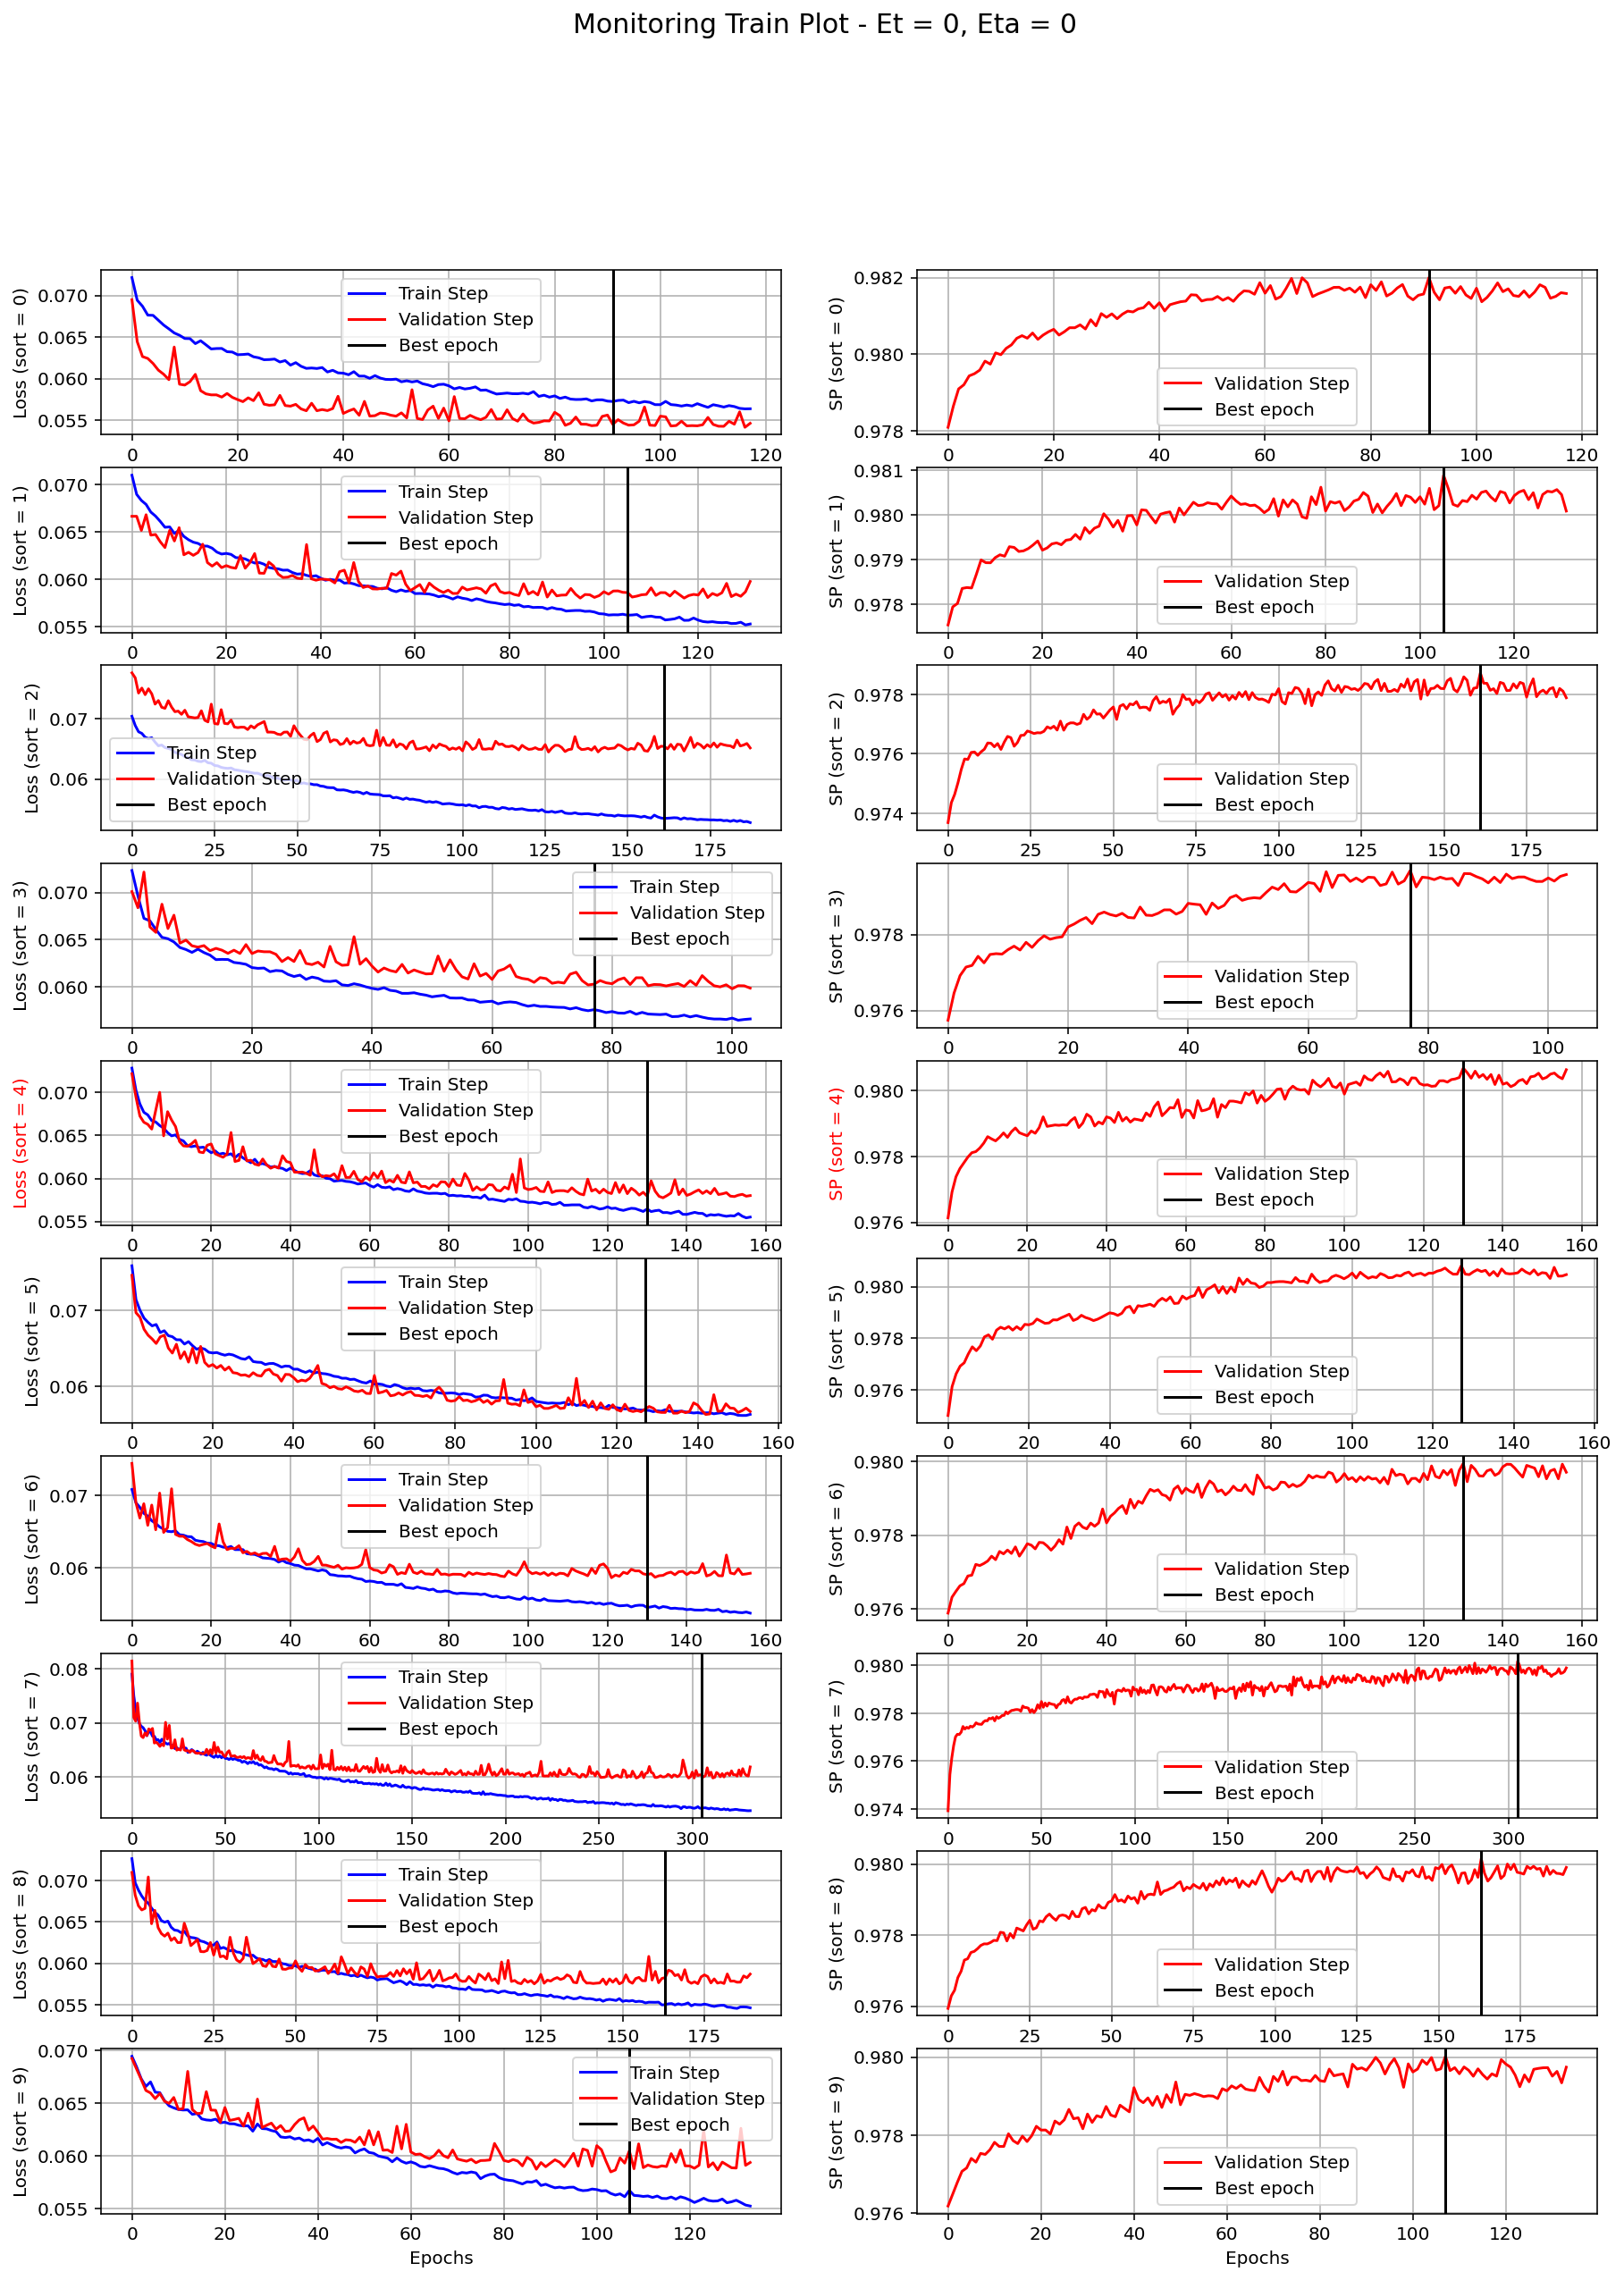

In [30]:
make_train_plots(cv, best_inits, models_k2[3], 'plots_v10_model_3_k2')

### 3.2) Plot training curves for model 3 (K=2) with L2 regularization

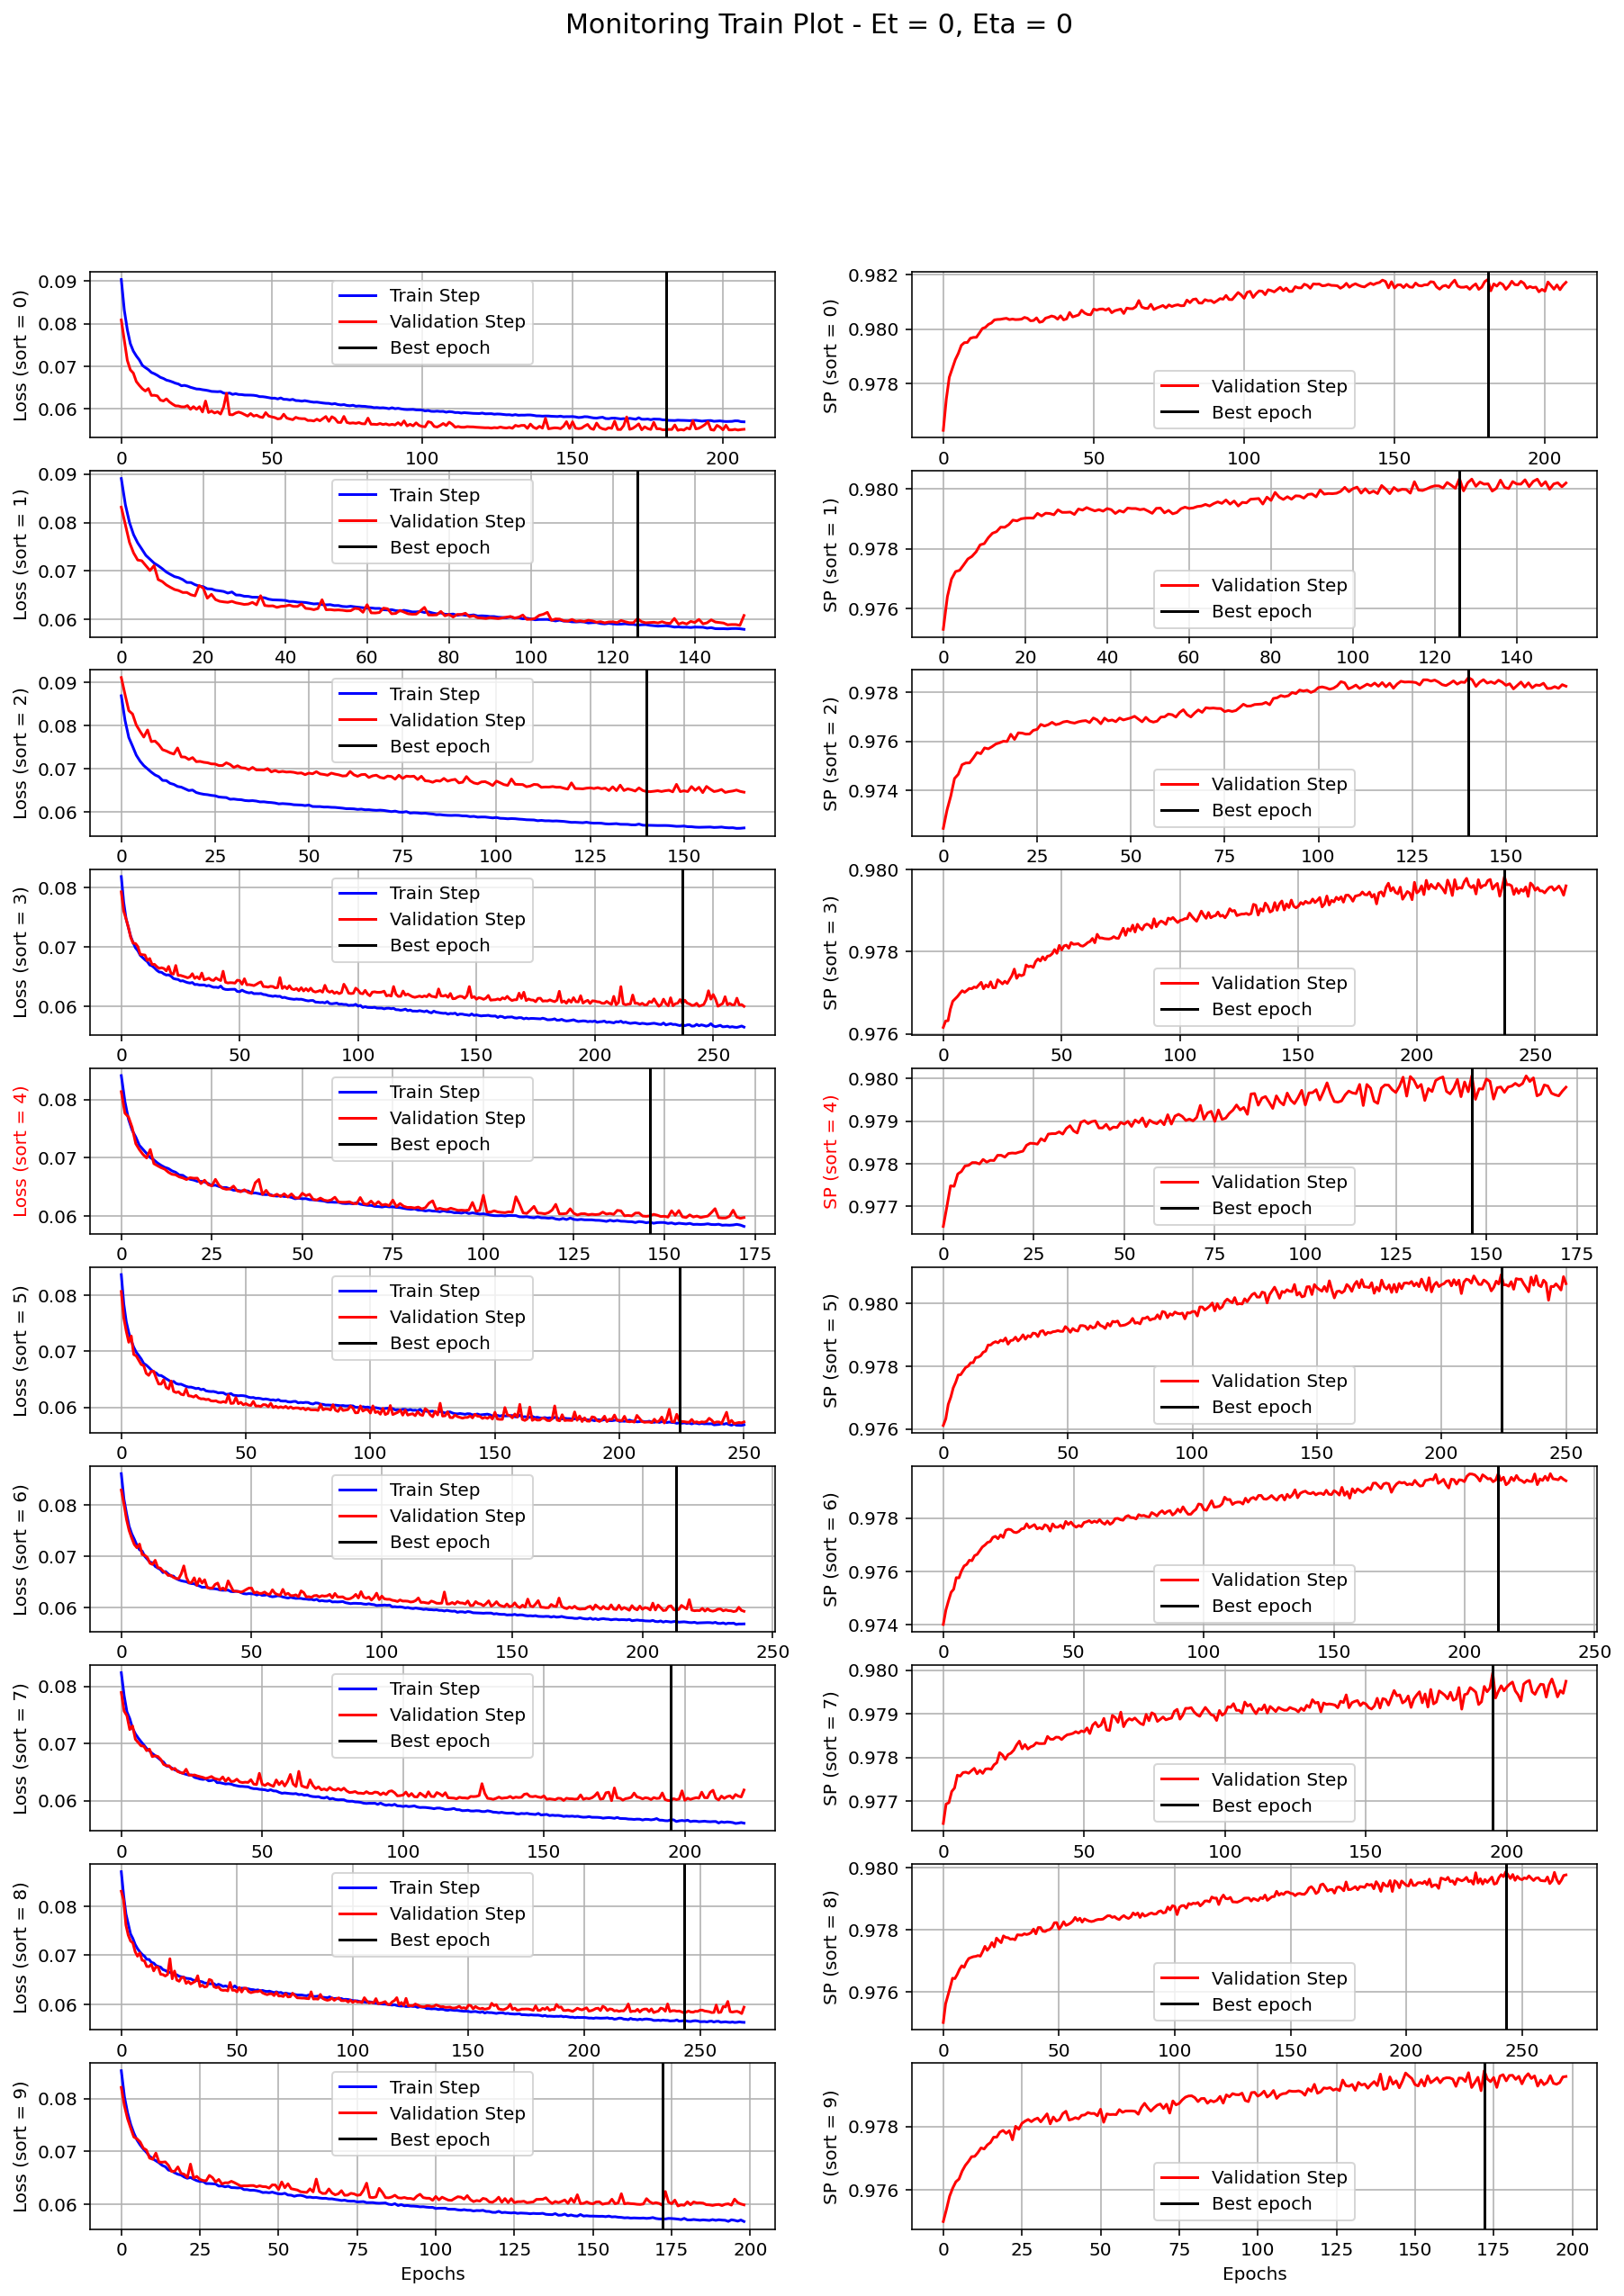

In [31]:
make_train_plots(cv, best_inits, models_k2_with_l2_reg[3], 'plots_v10_model_3_k2_with_l2_reg')

### 3.3) Plot training curves for model 3 (K=3)

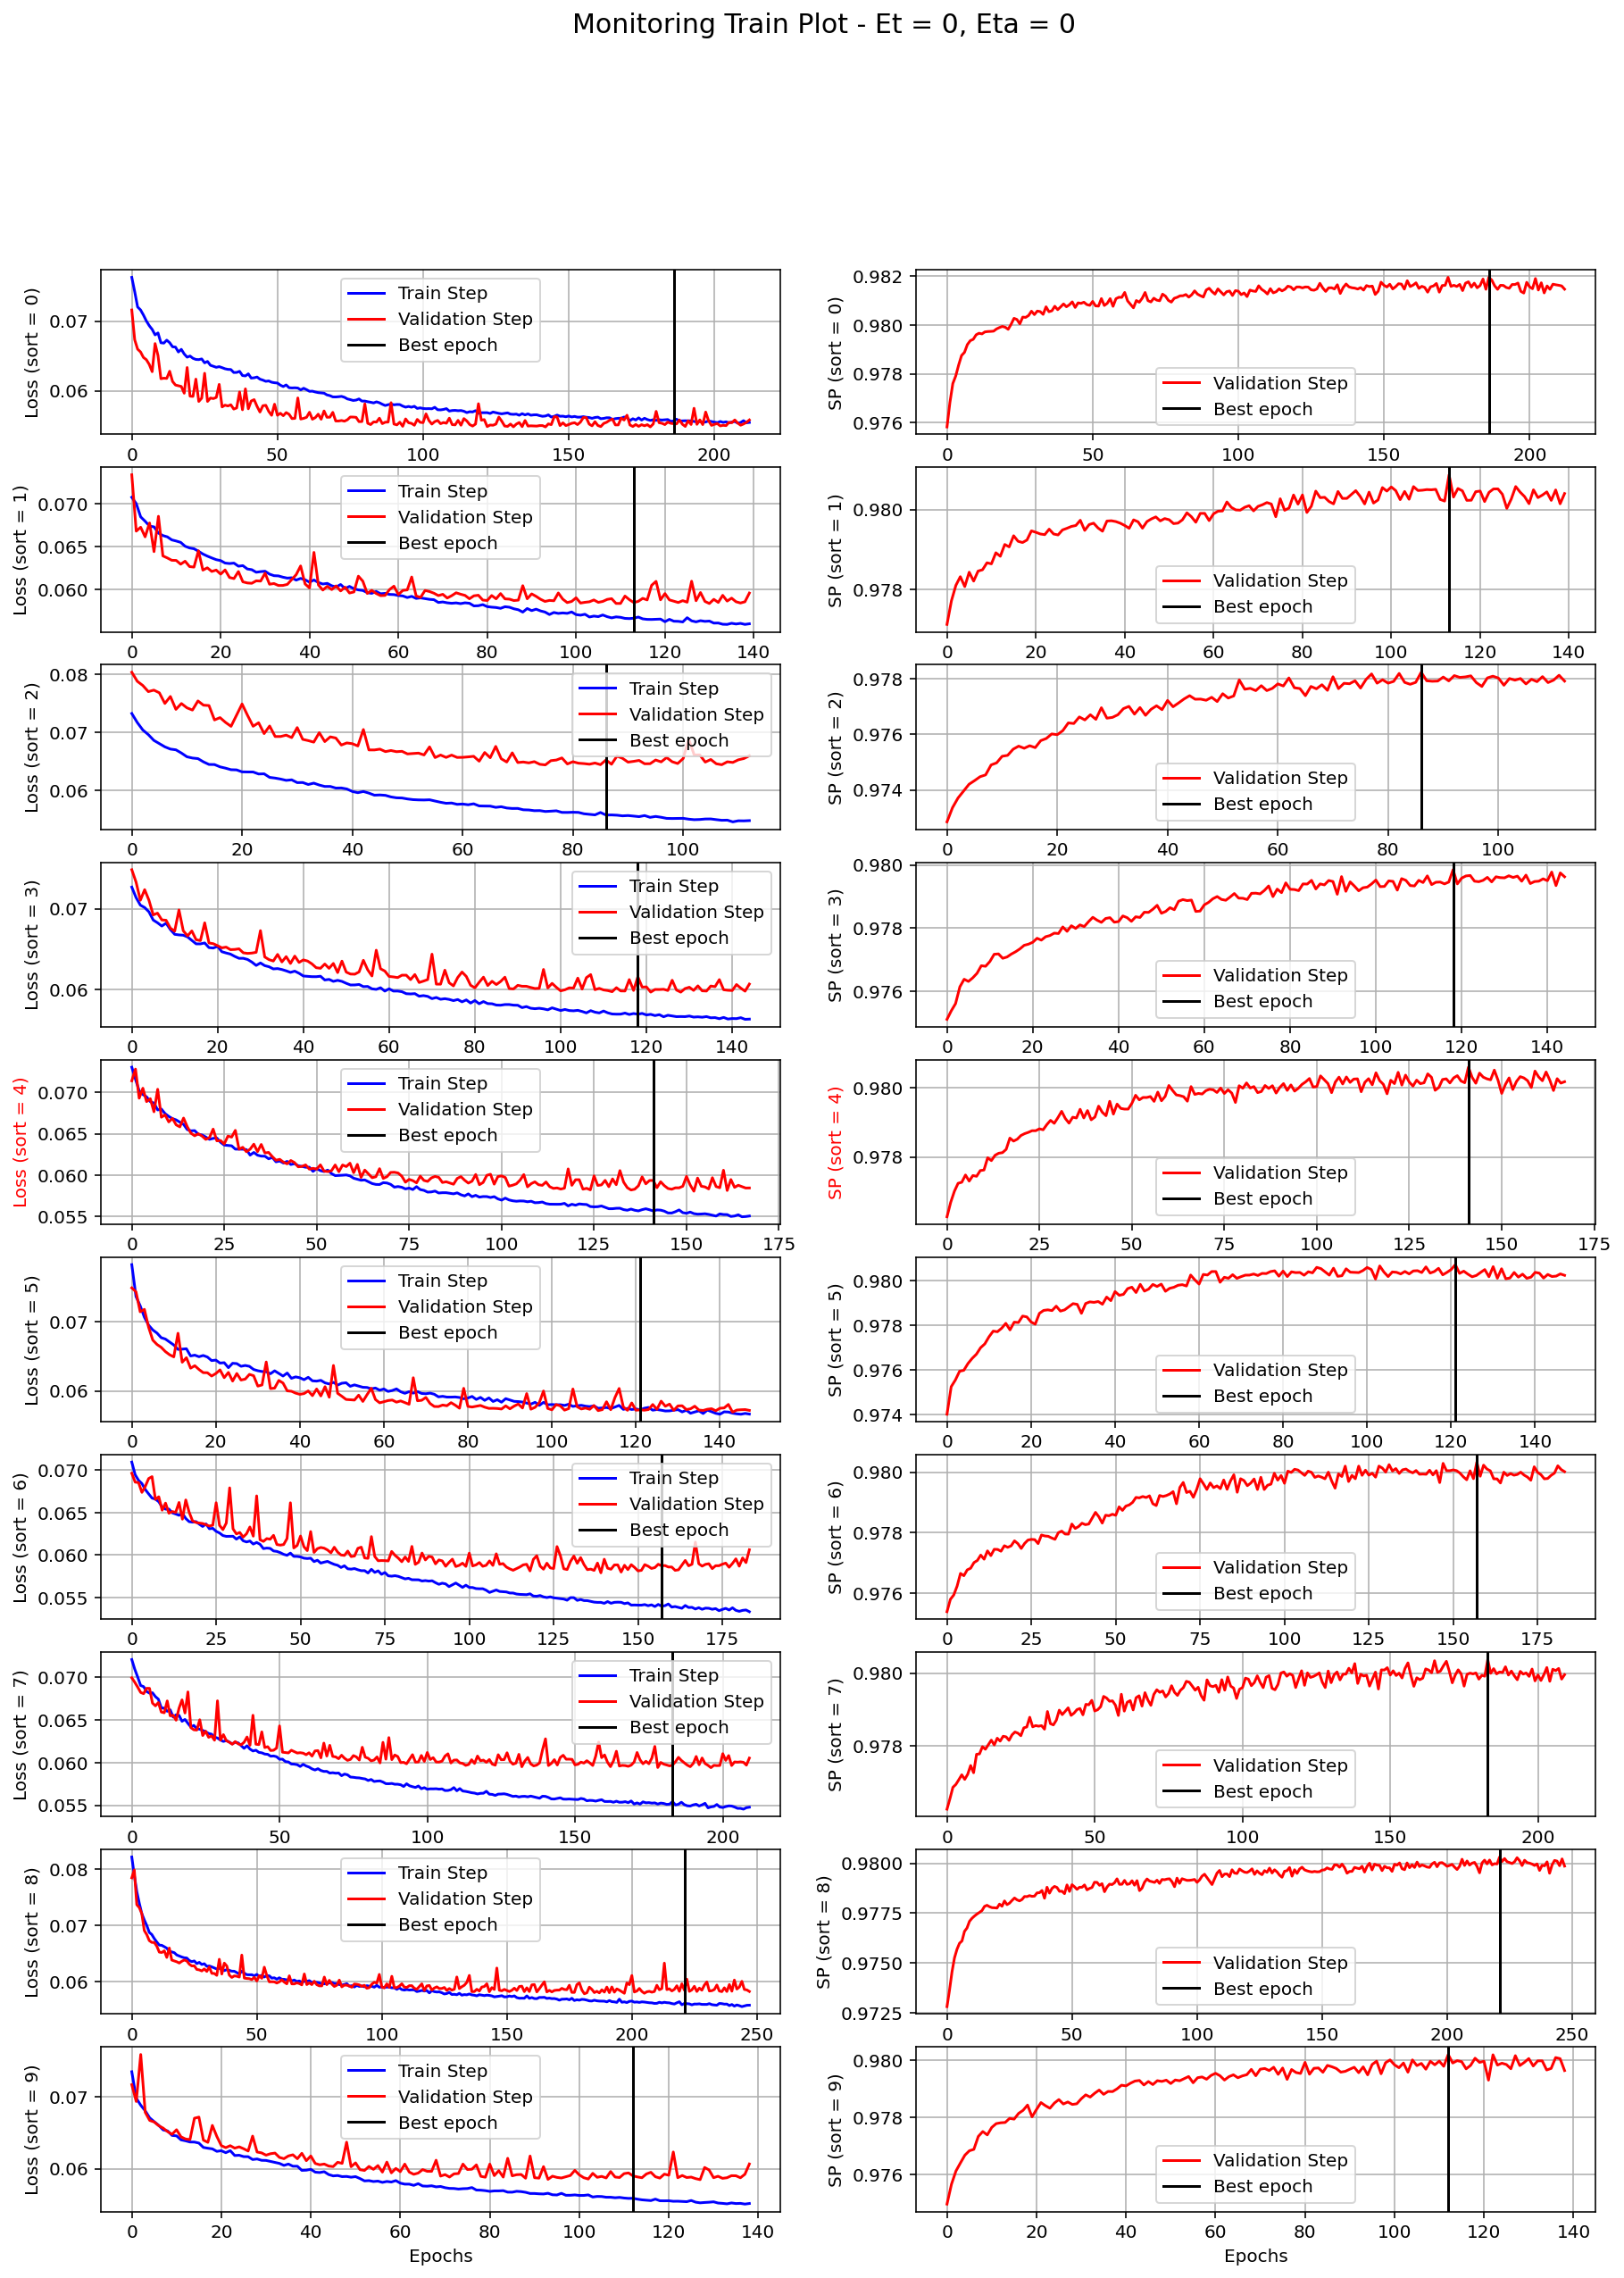

In [32]:
make_train_plots(cv, best_inits, models_k3[3], 'plots_v10_model_3_k3')

### 3.4) Plot training curves for model 3 (K=3) with L2 regularization

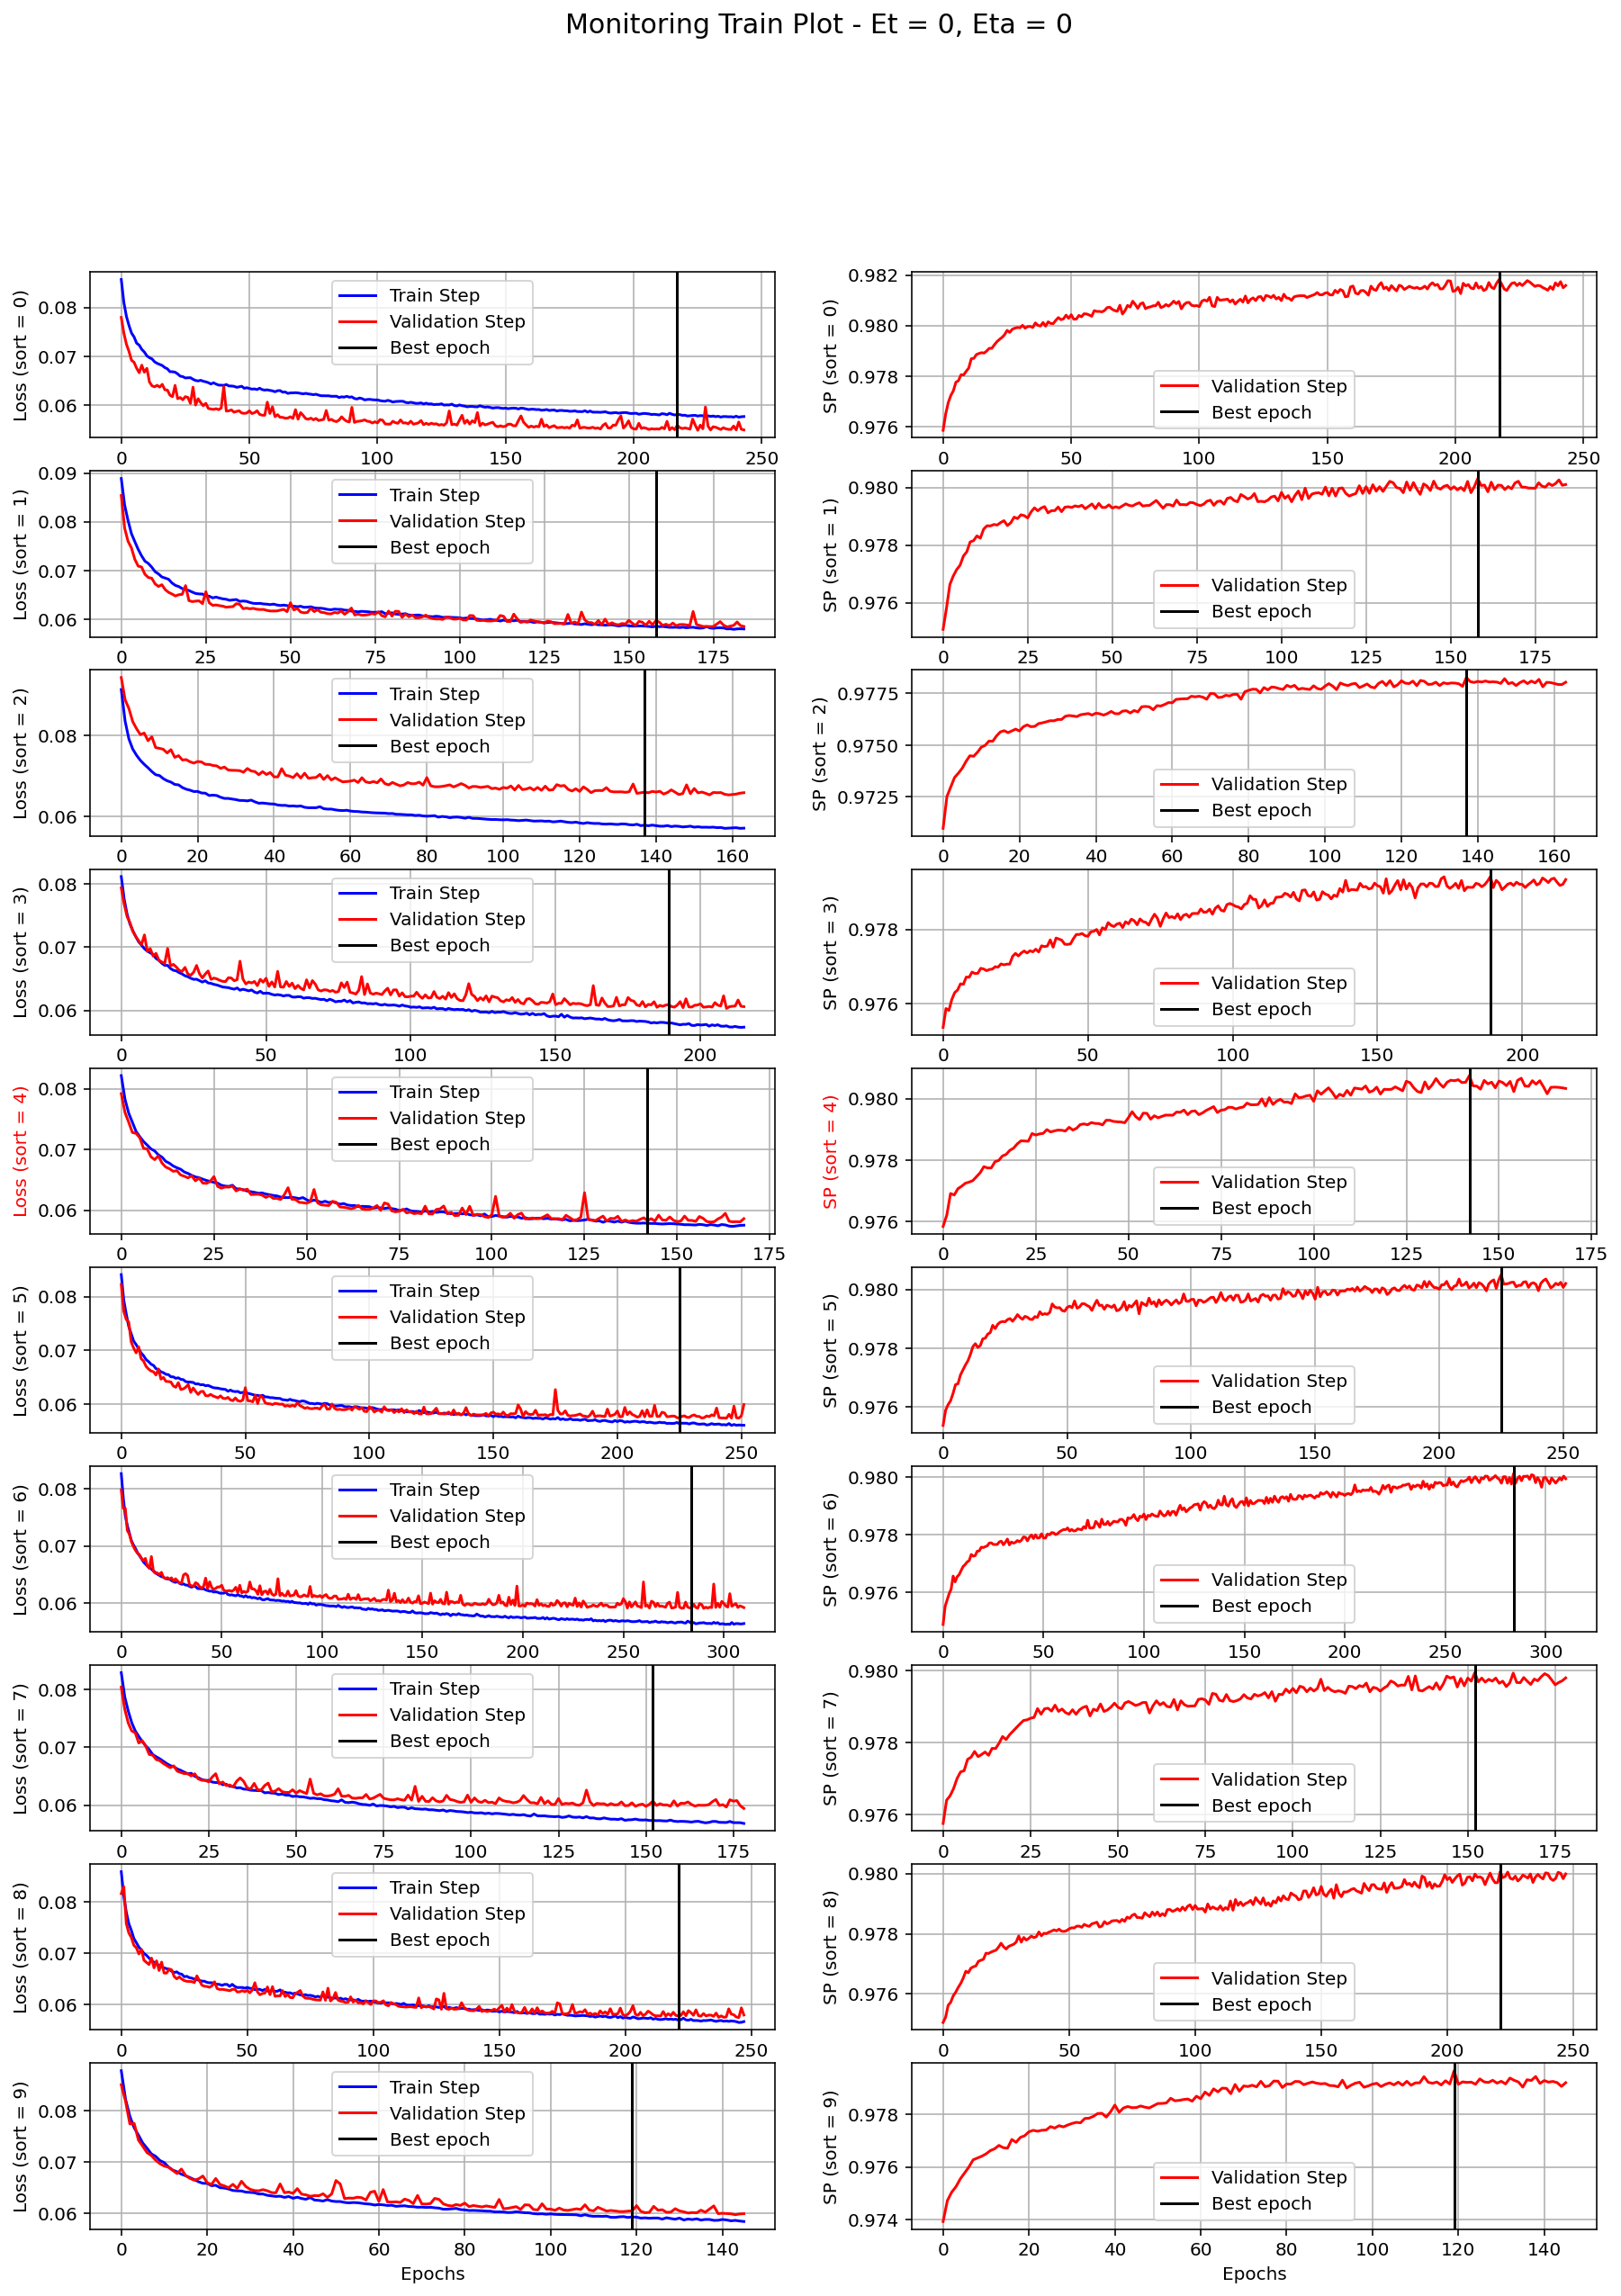

In [33]:
make_train_plots(cv, best_inits, models_k3_with_l2_reg[3], 'plots_v10_model_3_k3_with_l2_reg')

## 4) Conclusions:

We can conclude that the model 3 can have ~ the same performance than the POC version (model 6). The L2 regularization add some stability into the training. Abour kernel 2 and 3, all results are ~ the same. We choose kernel size as 3 becouse we the number of parameters is < than the kernel equal two. The selected model to operate as v10 tuning in all phase spaces will be:

- Rings->Conv1D(4,relu)->Conv1D(8,relu)->Flatten()->Dense(16,relu)->Dense(1)->Sigmoid();

With L2 regularization and kernel size equal 3.